<a href="https://colab.research.google.com/github/JoaoFTCunha/MBA_USP_ESALQ_DSA222/blob/main/Analise_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
# Carregando os dados
dados = pd.read_csv('/content/sample_data/Base_Aparas.csv', sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Verificar estrutura dos dados
print(dados.info())

# Verificando as primeiras linhas para entender a estrutura dos dados
print(dados.head())

# Verificando os nomes das colunas
print(dados.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   CD                                       2372 non-null   int64 
 1   DOCNUM                                   2372 non-null   int64 
 2   PSTDAT                                   2372 non-null   int64 
 3   MAKTX                                    2372 non-null   object
 4   MENGE                                    2372 non-null   int64 
 5   MEINS                                    2372 non-null   object
 6   PARID                                    2372 non-null   int64 
 7   REGIO                                    2372 non-null   object
 8   NETWRT                                   2372 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 166.9+ KB
None
   CD  DOCNUM      PSTDAT    MAKTX                                    \
0   1 

In [ ]:
# Vamos também imprimir os nomes das colunas com espaços removidos para verificar se esse é o problema
print([col.strip() for col in dados.columns])

# Se houver espaços, você pode removê-los com a seguinte linha
dados.columns = dados.columns.str.strip()

['CD', 'DOCNUM', 'PSTDAT', 'MAKTX', 'MENGE', 'MEINS', 'PARID', 'REGIO', 'NETWRT']


In [ ]:
# Remover espaços em branco dos valores em 'MEINS'
dados['MEINS'] = dados['MEINS'].str.strip()

In [ ]:
  # Agora, a conversão condicional dos valores em 'MENGE' deve funcionar
dados['MENGE'] = dados.apply(
    lambda row: row['MENGE']/1000 if row['MEINS'] == 'TO' else (row['MENGE']/1000)/1000 if row['MEINS'] == 'KG' else row['MENGE'],
    axis=1
)

# Confirme se a transformação foi feita corretamente
print(dados[['MEINS', 'MENGE']].head())

  MEINS  MENGE
0    TO    1.0
1    TO    1.0
2    TO    1.0
3    TO    1.0
4    TO    1.0


In [ ]:
# Dicionário com os nomes antigos das colunas mapeados para os novos nomes
renomear_colunas = {
    'CD': 'ID',
    'DOCNUM': 'NUM_DOC',
    'PSTDAT': 'DATA',
    'MAKTX': 'TIPO_APARAS',
    'MENGE': 'QTD_TON',
    'MEINS': 'UND',
    'PARID': 'ID_FORNEC',
    'REGIO': 'REGIAO',
    'NETWRT': 'PRECO_TON'
}

# Renomeando as colunas
dados.rename(columns=renomear_colunas, inplace=True)

# Verifique se as colunas foram renomeadas corretamente
print(dados.head())

   ID  NUM_DOC      DATA                              TIPO_APARAS  QTD_TON  \
0   1   841994  20220105  APARAS PAPELAO ONDULADO II 030105 IBAMA      1.0   
1   2   841994  20220105  APARAS PAPELAO ONDULADO II 030105 IBAMA      1.0   
2   3   841994  20220105  APARAS PAPELAO ONDULADO II 030105 IBAMA      1.0   
3   4   841994  20220105  APARAS PAPELAO ONDULADO II 030105 IBAMA      1.0   
4   5   841995  20220105  APARAS PAPELAO ONDULADO II 030105 IBAMA      1.0   

  UND  ID_FORNEC REGIAO  PRECO_TON  
0  TO    1122424  MG         83527  
1  TO    1122424  MG         83527  
2  TO    1122424  MG         83527  
3  TO    1122424  MG         83527  
4  TO    1122424  MG         56178  


In [ ]:
# Convertendo a coluna 'DATA' de inteiro para string e depois para datetime
dados['DATA'] = pd.to_datetime(dados['DATA'].astype(str), format='%Y%m%d')

In [ ]:
# Certifique-se de que as colunas são numéricas
#dados['QTD_TON'] = pd.to_numeric(dados['QTD_TON'], errors='coerce')
#dados['PRECO_TON'] = pd.to_numeric(dados['PRECO_TON'], errors='coerce')

# Ajustar os decimais da coluna PRECO_TON
dados['PRECO_TON'] = dados['PRECO_TON'] / 100.0

In [ ]:
# Agora, calcular o preço por tonelada
dados['PRECO_POR_TON'] = dados['PRECO_TON'] / dados['QTD_TON']

In [ ]:
# Sumário estatístico para dados numéricos
print(dados['QTD_TON'].describe())  # Peso das aparas negociadas
print(dados['PRECO_POR_TON'].describe())  # Preço praticado por tonelada

count    2372.000000
mean       11.406536
std        11.351254
min         0.300000
25%         1.000000
50%        11.140000
75%        18.610000
max        41.300000
Name: QTD_TON, dtype: float64
count    2372.000000
mean     1652.565961
std      1504.420261
min        38.930000
25%       844.799910
50%      1020.799947
75%      1694.970000
max      7849.840000
Name: PRECO_POR_TON, dtype: float64


In [ ]:
# Contagem de valores únicos para dados categóricos
print(dados['ID_FORNEC'].nunique())  # Identificação do fornecedor

78


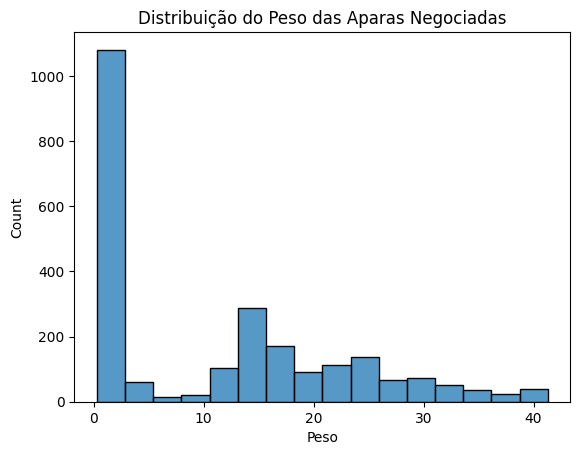

In [ ]:
# Histograma para visualizar a distribuição do peso das aparas negociadas
sns.histplot(dados['QTD_TON'])
plt.title('Distribuição do Peso das Aparas Negociadas')
plt.xlabel('Peso')
plt.show()


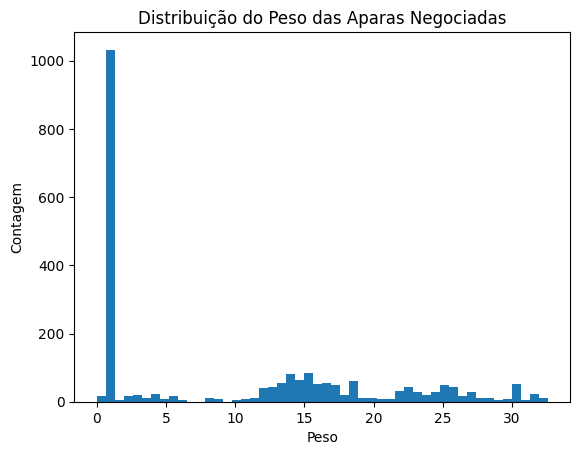

In [ ]:
# Histograma com limite no eixo-x
plt.hist(dados['QTD_TON'], bins=50, range=[0, dados['QTD_TON'].quantile(0.95)])  # Limitando aos 95% dos dados
plt.title('Distribuição do Peso das Aparas Negociadas')
plt.xlabel('Peso')
plt.ylabel('Contagem')
plt.show()

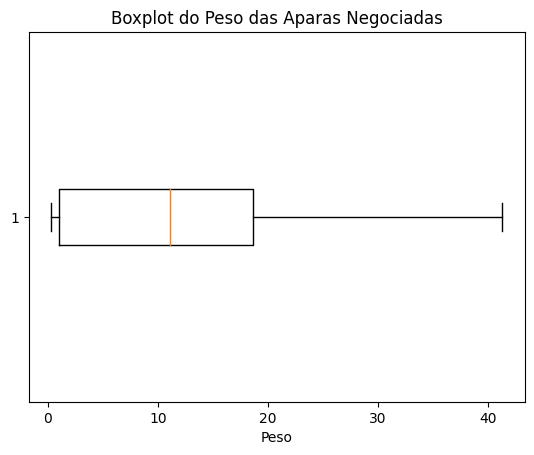

In [ ]:
# Boxplot para visualizar outliers
plt.boxplot(dados['QTD_TON'], vert=False)
plt.title('Boxplot do Peso das Aparas Negociadas')
plt.xlabel('Peso')
plt.show()

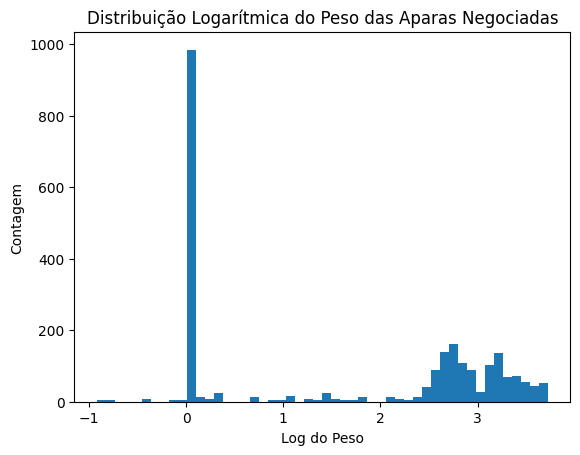

In [ ]:
# Aplicar a transformação logarítmica e plotar o histograma
# Adiciona-se um valor pequeno para evitar o log de zero
plt.hist(np.log(dados['QTD_TON'] + 0.1), bins=50)
plt.title('Distribuição Logarítmica do Peso das Aparas Negociadas')
plt.xlabel('Log do Peso')
plt.ylabel('Contagem')
plt.show()

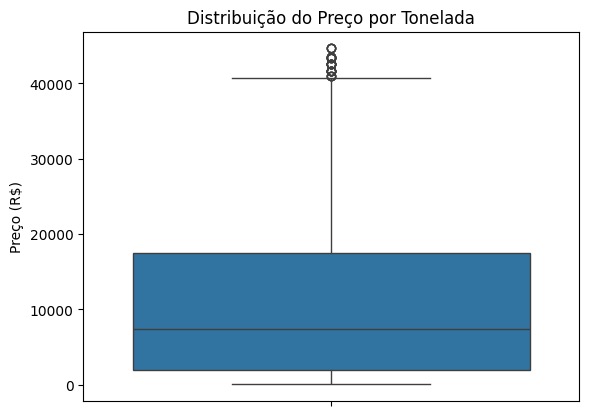

In [ ]:
# Boxplot para visualizar a distribuição do preço por tonelada
sns.boxplot(y=dados['PRECO_TON'])
plt.title('Distribuição do Preço por Tonelada')
plt.ylabel('Preço (R$)')
plt.show()

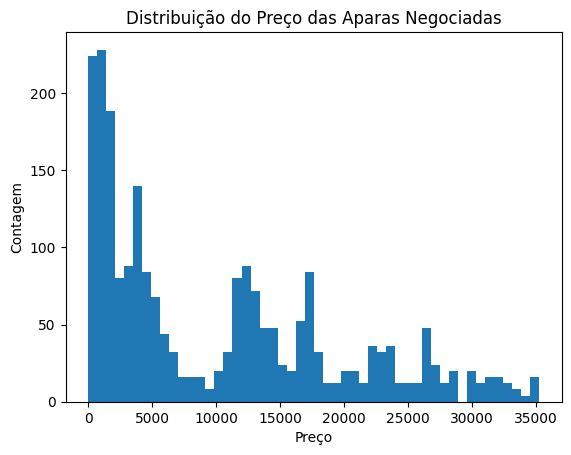

In [ ]:
# Histograma com limite no eixo-x
plt.hist(dados['PRECO_TON'], bins=50, range=[0, dados['PRECO_TON'].quantile(0.95)])  # Limitando aos 95% dos dados
plt.title('Distribuição do Preço das Aparas Negociadas')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()


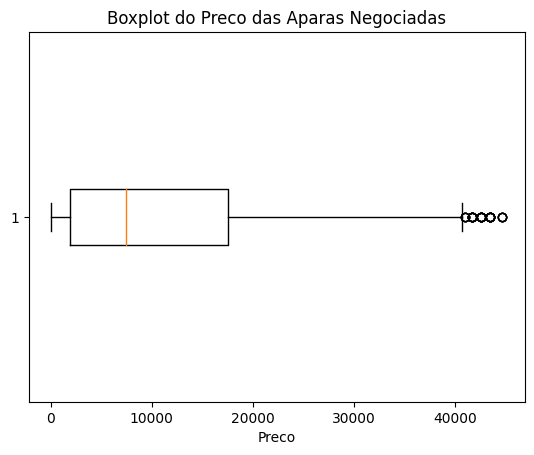

In [ ]:
# Boxplot para visualizar outliers
plt.boxplot(dados['PRECO_TON'], vert=False)
plt.title('Boxplot do Preco das Aparas Negociadas')
plt.xlabel('Preco')
plt.show()

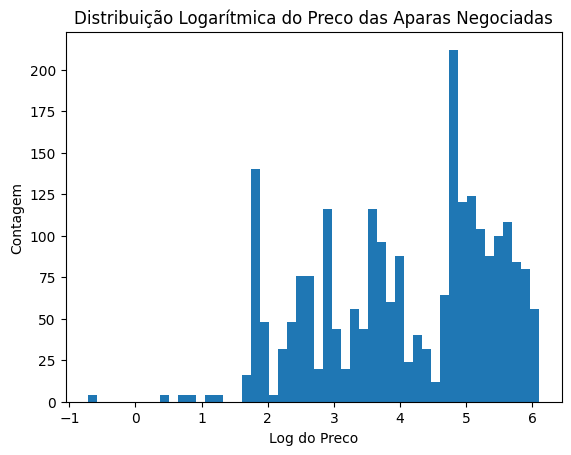

In [ ]:
# Aplicar a transformação logarítmica e plotar o histograma
# Adiciona-se um valor pequeno para evitar o log de zero
plt.hist(np.log(dados['PRECO_TON'] + 0.1), bins=50)
plt.title('Distribuição Logarítmica do Preco das Aparas Negociadas')
plt.xlabel('Log do Preco')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Checagem de Duplicatas
duplicatas = dados.duplicated()
print(f"Existem {duplicatas.sum()} duplicatas no conjunto de dados.")

Existem 0 duplicatas no conjunto de dados.


In [ ]:
# Remoção de duplicatas
dados = dados.drop_duplicates()
print(f"Após remover duplicatas, restam {dados.shape[0]} registros.")

Após remover duplicatas, restam 2372 registros.


In [ ]:
# Validando os valores numéricos
quantidades_invalidas = dados['QTD_TON'] <= 0
precos_invalidos = dados['PRECO_POR_TON'] <= 0
print(f"Existem {quantidades_invalidas.sum()} registros com quantidade negativa ou zero.")
print(f"Existem {precos_invalidos.sum()} registros com preço negativo ou zero.")

Existem 0 registros com quantidade negativa ou zero.
Existem 0 registros com preço negativo ou zero.


In [ ]:
# Validação de Datas
dados['DATA'] = pd.to_datetime(dados['DATA'], errors='coerce')
datas_invalidas = dados['DATA'].isna()
print(f"Existem {datas_invalidas.sum()} datas inválidas no conjunto de dados.")

Existem 0 datas inválidas no conjunto de dados.


In [ ]:
# Remoção de linhas com dados inválidos
dados = dados[~(quantidades_invalidas | precos_invalidos | datas_invalidas)]
print(f"Após remover registros inválidos, restam {dados.shape[0]} linhas válidas no conjunto de dados.")

Após remover registros inválidos, restam 2372 linhas válidas no conjunto de dados.


In [ ]:
# Exemplo de código para análise de sazonalidade
dados['Mes'] = dados['DATA'].dt.month
sazonalidade_preco = dados.groupby('Mes')['PRECO_POR_TON'].mean()
sazonalidade_quantidade = dados.groupby('Mes')['QTD_TON'].mean()

Text(0, 0.5, 'Preço Médio por Tonelada')

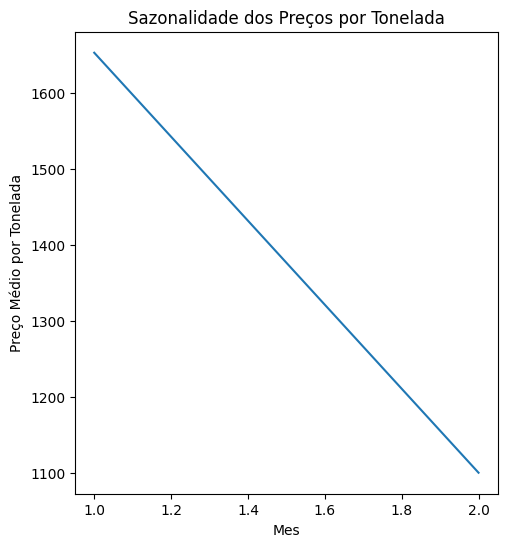

In [ ]:
# Visualização da sazonalidade
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sazonalidade_preco.plot(title='Sazonalidade dos Preços por Tonelada')
plt.ylabel('Preço Médio por Tonelada')

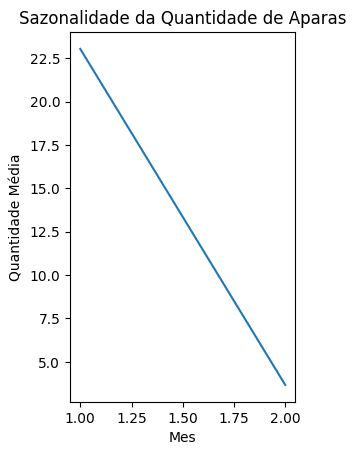

In [ ]:
plt.subplot(1, 2, 2)
sazonalidade_quantidade.plot(title='Sazonalidade da Quantidade de Aparas')
plt.ylabel('Quantidade Média')
plt.show()

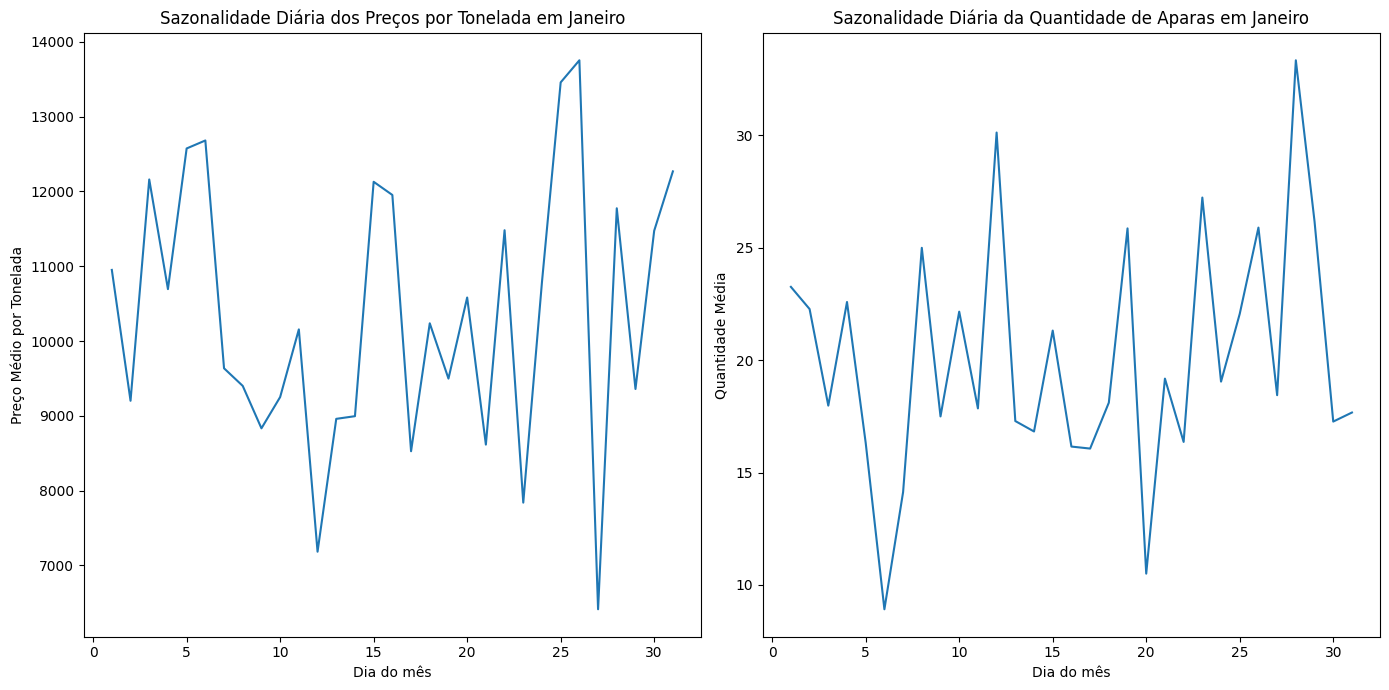

In [ ]:
# Para o exemplo, vamos criar um DataFrame simulado.
# Vamos supor que os dados cobrem todos os dias de janeiro.
dados_diario = pd.DataFrame({
    'DATA': pd.date_range(start='2022-01-01', end='2022-01-31', freq='D'),
    'PRECO_POR_TON': np.random.normal(10000, 2000, 31),  # Simulando preços
    'QTD_TON': np.random.normal(20, 5, 31)  # Simulando quantidades
})

# Adicionando uma coluna 'Dia' para representar o dia do mês
dados_diario['Dia'] = dados_diario['DATA'].dt.day

# Calculando a média diária de preço por tonelada e quantidade para o mês de janeiro
sazonalidade_preco_diaria = dados_diario.groupby('Dia')['PRECO_POR_TON'].mean()
sazonalidade_quantidade_diaria = dados_diario.groupby('Dia')['QTD_TON'].mean()

# Plotando a sazonalidade diária dos preços por tonelada
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sazonalidade_preco_diaria.plot(title='Sazonalidade Diária dos Preços por Tonelada em Janeiro')
plt.xlabel('Dia do mês')
plt.ylabel('Preço Médio por Tonelada')

# Plotando a sazonalidade diária da quantidade de aparas
plt.subplot(1, 2, 2)
sazonalidade_quantidade_diaria.plot(title='Sazonalidade Diária da Quantidade de Aparas em Janeiro')
plt.xlabel('Dia do mês')
plt.ylabel('Quantidade Média')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
# Exemplo de código para a avaliação de outliers
z_scores = np.abs(stats.zscore(dados[['QTD_TON', 'PRECO_POR_TON']]))
outliers = (z_scores > 3).any(axis=1)

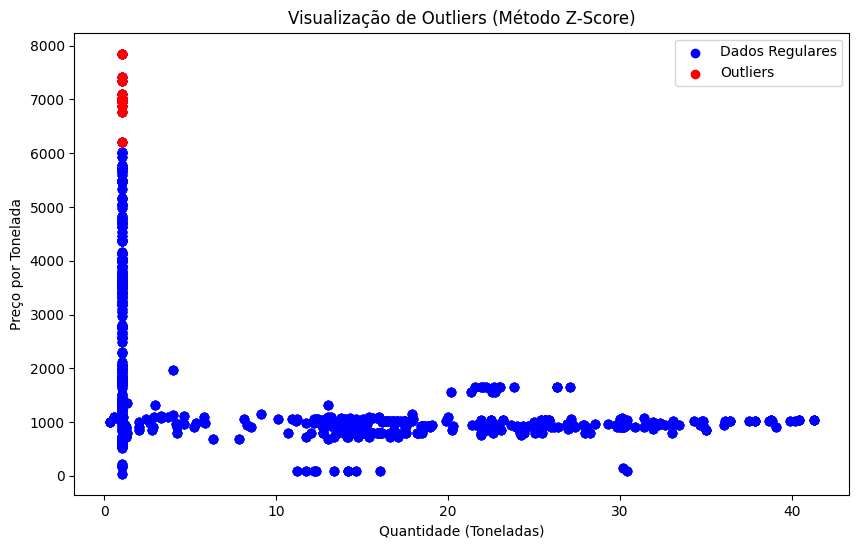

In [ ]:
# Visualização dos outliers
plt.figure(figsize=(10, 6))
plt.scatter(dados['QTD_TON'], dados['PRECO_POR_TON'], c='blue', label='Dados Regulares')
plt.scatter(dados[outliers]['QTD_TON'], dados[outliers]['PRECO_POR_TON'], c='red', label='Outliers')
plt.legend()
plt.xlabel('Quantidade (Toneladas)')
plt.ylabel('Preço por Tonelada')
plt.title('Visualização de Outliers (Método Z-Score)')
plt.show()

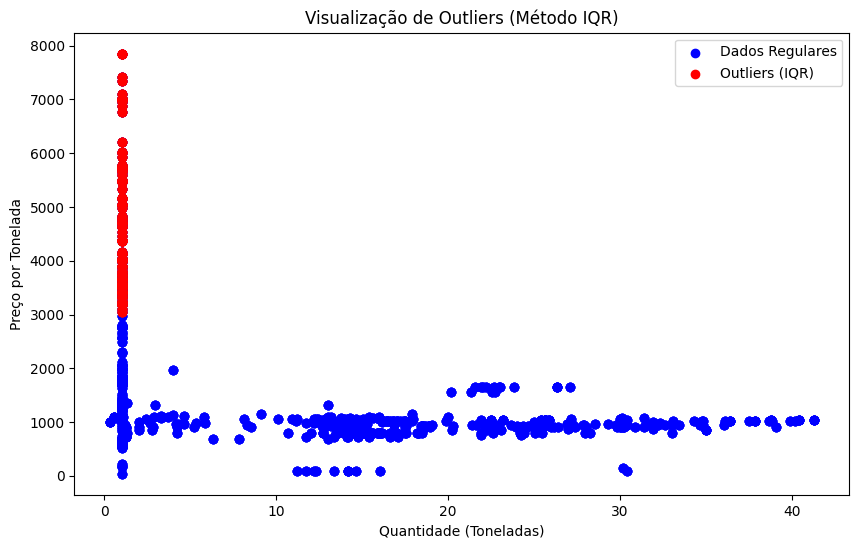

In [ ]:
# Calculando o IQR apenas para as colunas de interesse
Q1 = dados[['QTD_TON', 'PRECO_POR_TON']].quantile(0.25, numeric_only=True)
Q3 = dados[['QTD_TON', 'PRECO_POR_TON']].quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Identificando outliers
outliers_iqr = ((dados[['QTD_TON', 'PRECO_POR_TON']] < (Q1 - 1.5 * IQR)) | (dados[['QTD_TON', 'PRECO_POR_TON']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Visualização dos outliers
plt.figure(figsize=(10, 6))
plt.scatter(dados['QTD_TON'], dados['PRECO_POR_TON'], c='blue', label='Dados Regulares')
plt.scatter(dados[outliers_iqr]['QTD_TON'], dados[outliers_iqr]['PRECO_POR_TON'], c='red', label='Outliers (IQR)')
plt.legend()
plt.xlabel('Quantidade (Toneladas)')
plt.ylabel('Preço por Tonelada')
plt.title('Visualização de Outliers (Método IQR)')
plt.show()

In [ ]:
# Exemplo de código para calcular a quantidade e porcentagem de dados ausentes
dados_faltantes = dados.isnull().sum()
porcentagem_faltantes = (dados.isnull().sum() / len(dados)) * 100

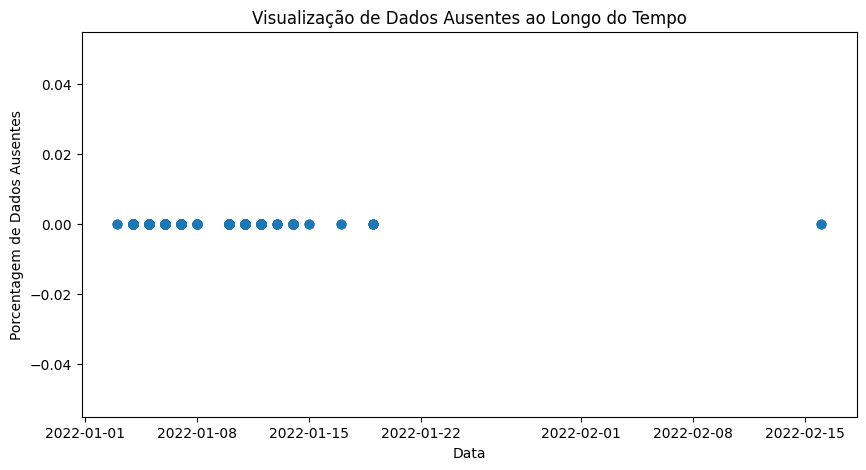

In [ ]:
# Visualização de dados ausentes ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(dados['DATA'], dados.isnull().mean(axis=1), marker='o', linestyle='')
plt.title('Visualização de Dados Ausentes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Porcentagem de Dados Ausentes')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalização
scaler_minmax = MinMaxScaler()
dados['PRECO_POR_TON_NORM'] = scaler_minmax.fit_transform(dados[['PRECO_POR_TON']])

# Padronização
scaler_standard = StandardScaler()
dados['PRECO_POR_TON_STD'] = scaler_standard.fit_transform(dados[['PRECO_POR_TON']])



In [ ]:
# Tabela de amostra para dados normalizados e padronizados
amostra_normalizada_padronizada = dados[['DATA', 'PRECO_POR_TON', 'PRECO_POR_TON_NORM', 'PRECO_POR_TON_STD']].head()
amostra_normalizada_padronizada.head()

,DATA,PRECO_POR_TON,PRECO_POR_TON_NORM,PRECO_POR_TON_STD
0,2022-01-05,835.27,0.000106,-0.379182
1,2022-01-05,835.27,0.000106,-0.379182
2,2022-01-05,835.27,0.000106,-0.379182
3,2022-01-05,835.27,0.000106,-0.379182
4,2022-01-05,561.78,0.000072,-0.379425


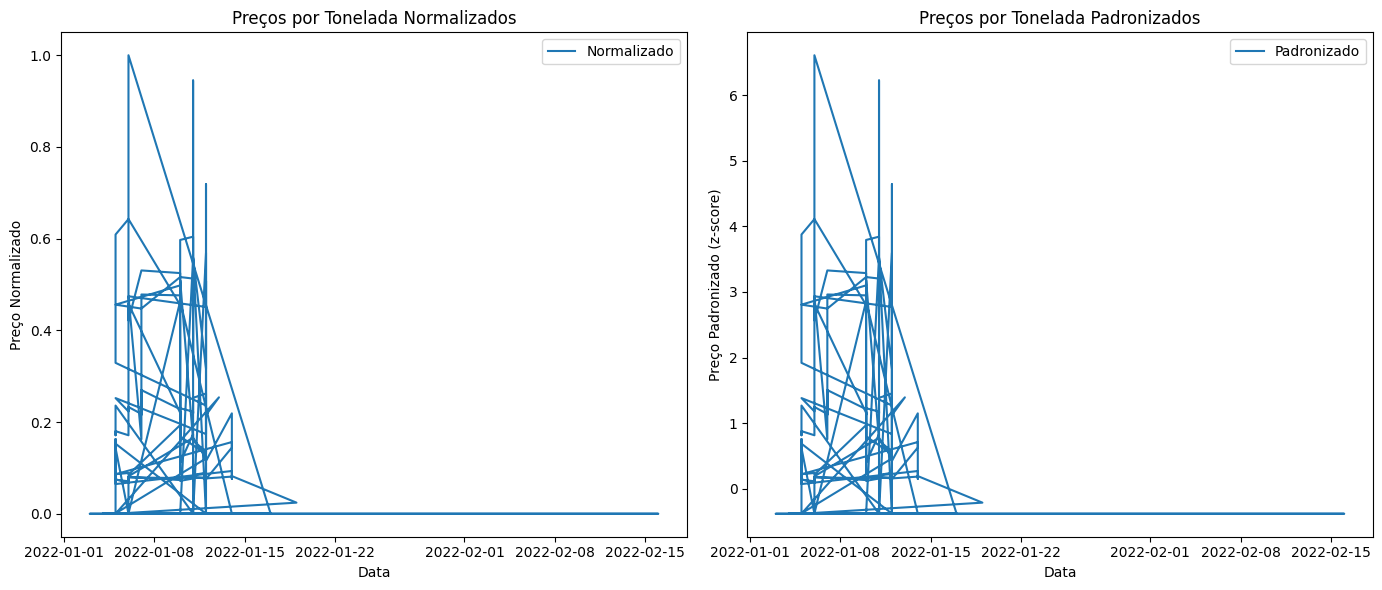

In [ ]:
# Gráficos de normalização e padronização
plt.figure(figsize=(14, 6))
# Gráfico de preços normalizados
plt.subplot(1, 2, 1)
plt.plot(dados['DATA'], dados['PRECO_POR_TON_NORM'], label='Normalizado')
plt.title('Preços por Tonelada Normalizados')
plt.xlabel('Data')
plt.ylabel('Preço Normalizado')
plt.legend()

# Gráfico de preços padronizados
plt.subplot(1, 2, 2)
plt.plot(dados['DATA'], dados['PRECO_POR_TON_STD'], label='Padronizado')
plt.title('Preços por Tonelada Padronizados')
plt.xlabel('Data')
plt.ylabel('Preço Padronizado (z-score)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Média móvel de 7 dias para o preço por tonelada
# Usaremos 'dropna()' para remover os valores NaN iniciais da média móvel
dados['PRECO_POR_TON_MA7'] = dados['PRECO_POR_TON'].rolling(window=7).mean().dropna()

In [ ]:
# Tabela de amostra para variáveis derivadas
amostra_variaveis_derivadas = dados[['DATA', 'PRECO_POR_TON', 'PRECO_POR_TON_MA7', 'DIA_DO_MES']].head()
amostra_variaveis_derivadas.head()

,DATA,PRECO_POR_TON,PRECO_POR_TON_MA7,DIA_DO_MES
0,2022-01-05,835.27,NaN,5
1,2022-01-05,835.27,NaN,5
2,2022-01-05,835.27,NaN,5
3,2022-01-05,835.27,NaN,5
4,2022-01-05,561.78,NaN,5


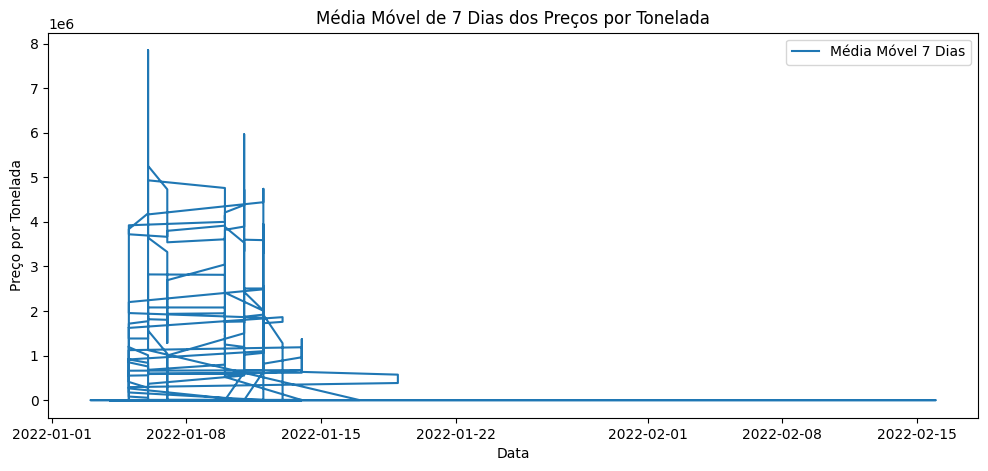

In [ ]:
# Gráfico de média móvel excluindo os primeiros 6 dias com NaN
plt.figure(figsize=(12, 5))
plt.plot(dados['DATA'][6:], dados['PRECO_POR_TON_MA7'][6:], label='Média Móvel 7 Dias')
plt.title('Média Móvel de 7 Dias dos Preços por Tonelada')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()

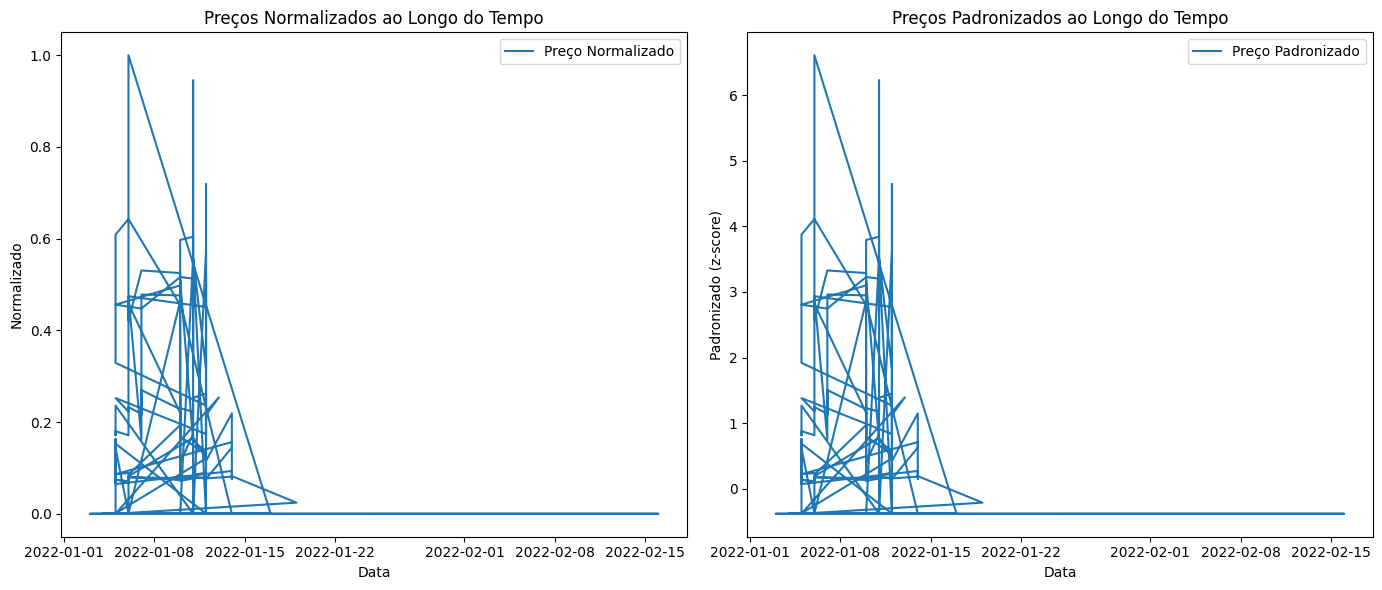

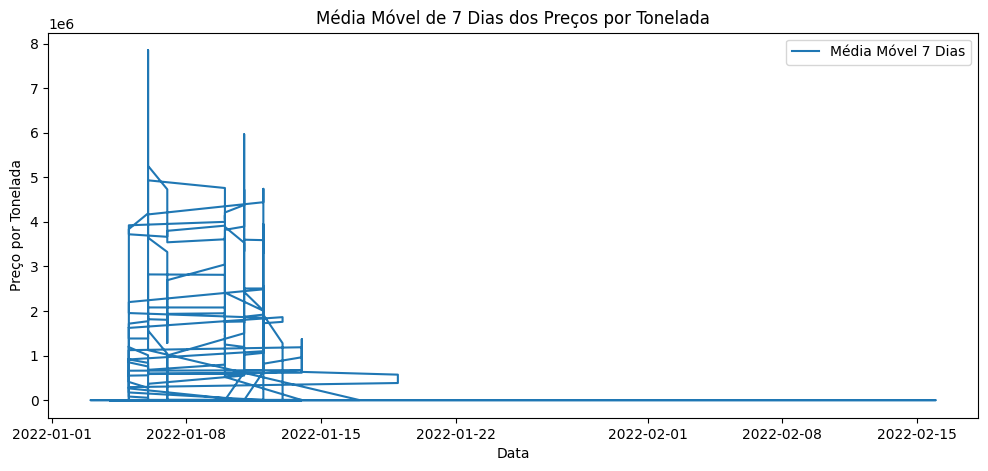

In [ ]:
# Gráficos de linha para preços normalizados e padronizados
plt.figure(figsize=(14, 6))

# Gráfico de Preços Normalizados
plt.subplot(1, 2, 1)
plt.plot(dados['DATA'], dados['PRECO_POR_TON_NORM'], label='Preço Normalizado')
plt.title('Preços Normalizados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Normalizado')
plt.legend()

# Gráfico de Preços Padronizados
plt.subplot(1, 2, 2)
plt.plot(dados['DATA'], dados['PRECO_POR_TON_STD'], label='Preço Padronizado')
plt.title('Preços Padronizados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Padronizado (z-score)')
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico para a média móvel
plt.figure(figsize=(12, 5))
plt.plot(dados['DATA'], dados['PRECO_POR_TON_MA7'], label='Média Móvel 7 Dias')
plt.title('Média Móvel de 7 Dias dos Preços por Tonelada')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()


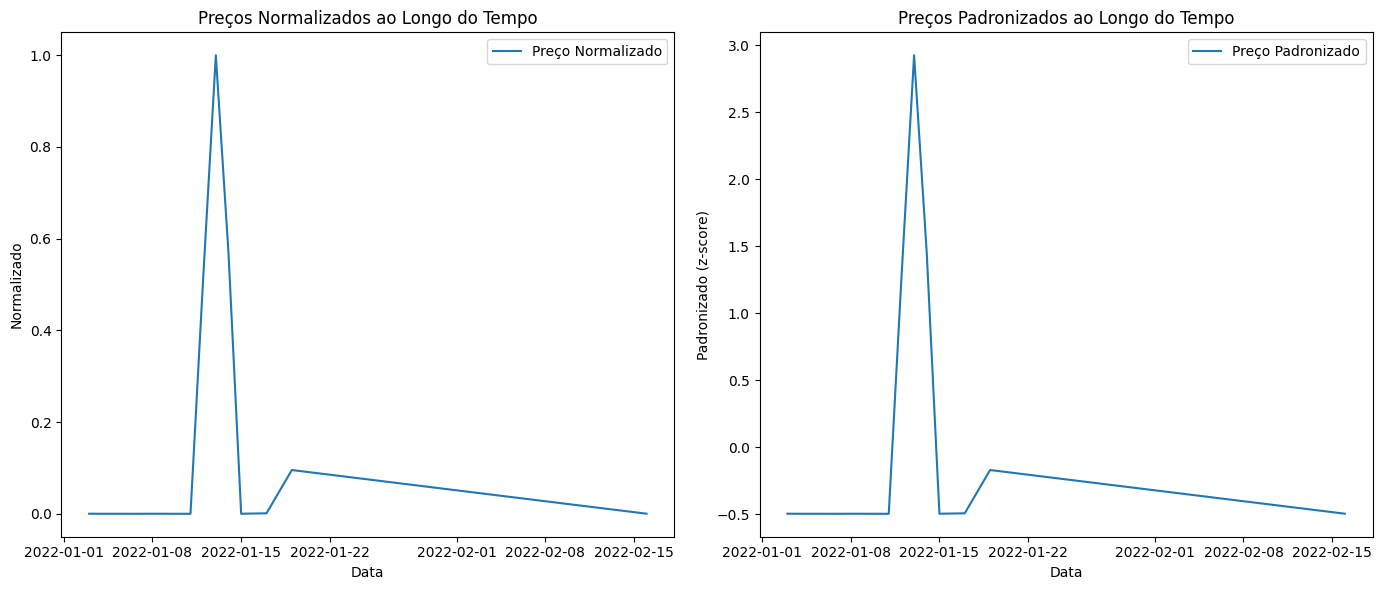

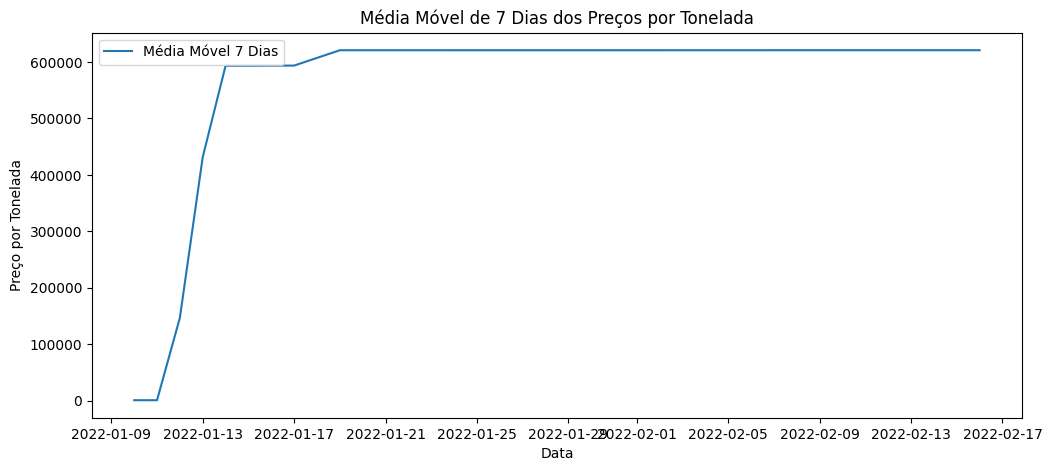

In [ ]:
# Vamos remover duplicatas baseadas na 'DATA' para evitar sobreposições desnecessárias nos gráficos.
dados_unicos = dados.drop_duplicates(subset='DATA')

# Verificamos se a coluna 'PRECO_POR_TON' tem valores duplicados na mesma data
# Se sim, poderíamos agregá-los calculando a média dos preços nessa data
dados_unicos = dados_unicos.groupby('DATA').agg({
    'PRECO_POR_TON': 'mean',
    'PRECO_POR_TON_NORM': 'mean',
    'PRECO_POR_TON_STD': 'mean',
    'PRECO_POR_TON_MA7': 'mean'
}).reset_index()

# Normalização e Padronização usando os dados únicos
scaler_minmax = MinMaxScaler()
dados_unicos['PRECO_POR_TON_NORM'] = scaler_minmax.fit_transform(dados_unicos[['PRECO_POR_TON']])

scaler_standard = StandardScaler()
dados_unicos['PRECO_POR_TON_STD'] = scaler_standard.fit_transform(dados_unicos[['PRECO_POR_TON']])

# Recalculando a média móvel de 7 dias para os dados únicos
dados_unicos['PRECO_POR_TON_MA7'] = dados_unicos['PRECO_POR_TON'].rolling(window=7, min_periods=1).mean()

# Agora, vamos criar os gráficos ajustados

# Gráficos de linha para preços normalizados e padronizados
plt.figure(figsize=(14, 6))

# Gráfico de Preços Normalizados
plt.subplot(1, 2, 1)
plt.plot(dados_unicos['DATA'], dados_unicos['PRECO_POR_TON_NORM'], label='Preço Normalizado')
plt.title('Preços Normalizados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Normalizado')
plt.legend()

# Gráfico de Preços Padronizados
plt.subplot(1, 2, 2)
plt.plot(dados_unicos['DATA'], dados_unicos['PRECO_POR_TON_STD'], label='Preço Padronizado')
plt.title('Preços Padronizados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Padronizado (z-score)')
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico para a média móvel
plt.figure(figsize=(12, 5))
plt.plot(dados_unicos['DATA'][6:], dados_unicos['PRECO_POR_TON_MA7'][6:], label='Média Móvel 7 Dias')
plt.title('Média Móvel de 7 Dias dos Preços por Tonelada')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/pytho

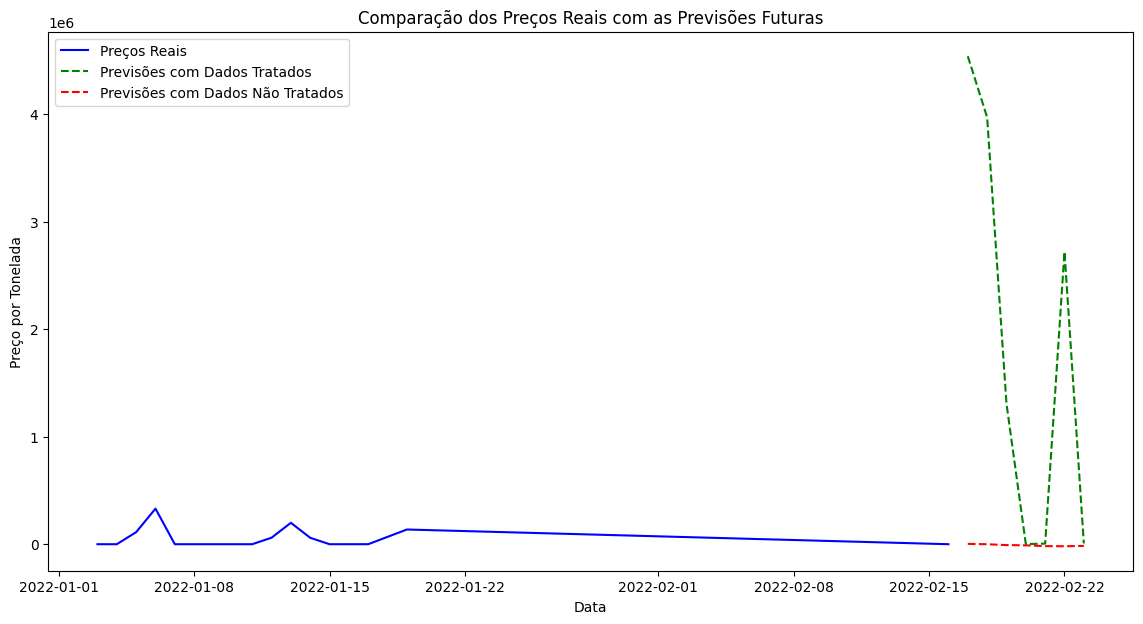

In [ ]:
# Carregamos o dataset e aplicamos os tratamentos de dados conforme o script fornecido
# Para simplificar, iremos assumir que os tratamentos já foram aplicados conforme as instruções do usuário
# e aplicaremos diretamente o modelo de suavização exponencial.

# Carregando os dados novamente para começar a análise de suavização exponencial
# Aqui, assumimos que 'dados' é um DataFrame pandas que já passou por todas as etapas de tratamento anteriores.

# Aplicação do modelo Exponential Smoothing aos dados tratados e não tratados
# Preparação do modelo com os dados tratados
dados_tratados = dados.copy()  # Supondo que 'dados' já está tratado conforme as etapas descritas

# Preparação do modelo com os dados não tratados
dados_nao_tratados = pd.read_csv('/content/sample_data/Base_Aparas.csv', sep=';')
dados_nao_tratados.columns = dados_nao_tratados.columns.str.strip()
dados_nao_tratados['DATA'] = pd.to_datetime(dados_nao_tratados['PSTDAT'].astype(str), format='%Y%m%d')
dados_nao_tratados['PRECO_POR_TON'] = dados_nao_tratados['NETWRT'] / (dados_nao_tratados['MENGE'] / 1000)

# Ordenação dos dados por data
dados_tratados.sort_values('DATA', inplace=True)
dados_nao_tratados.sort_values('DATA', inplace=True)

# Aplicando o modelo de suavização exponencial para os dados tratados
modelo_tratados = ExponentialSmoothing(dados_tratados['PRECO_POR_TON'],
                                       trend='add',
                                       seasonal='mul',
                                       seasonal_periods=7).fit()

# Aplicando o modelo de suavização exponencial para os dados não tratados
modelo_nao_tratados = ExponentialSmoothing(dados_nao_tratados['PRECO_POR_TON'],
                                           trend='add',
                                           seasonal='mul',
                                           seasonal_periods=7).fit()

# Previsões para os próximos 7 dias com os dados tratados
previsoes_futuras_tratados = modelo_tratados.forecast(7)

# Previsões para os próximos 7 dias com os dados não tratados
previsoes_futuras_nao_tratados = modelo_nao_tratados.forecast(7)

# Gerando gráficos de comparação
plt.figure(figsize=(14, 7))

# Preços reais
plt.plot(dados_tratados['DATA'], dados_tratados['PRECO_POR_TON'], label='Preços Reais', color='blue')

# Previsões com dados tratados
plt.plot(dados_tratados['DATA'].iloc[-1] + pd.to_timedelta(np.arange(1, 8), 'D'),
         previsoes_futuras_tratados, label='Previsões com Dados Tratados', color='green', linestyle='--')

# Previsões com dados não tratados
plt.plot(dados_nao_tratados['DATA'].iloc[-1] + pd.to_timedelta(np.arange(1, 8), 'D'),
         previsoes_futuras_nao_tratados, label='Previsões com Dados Não Tratados', color='red', linestyle='--')

plt.title('Comparação dos Preços Reais com as Previsões Futuras')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()


<ipython-input-22-2c4c0fd42510>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_outliers.sort_values('DATA', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.p

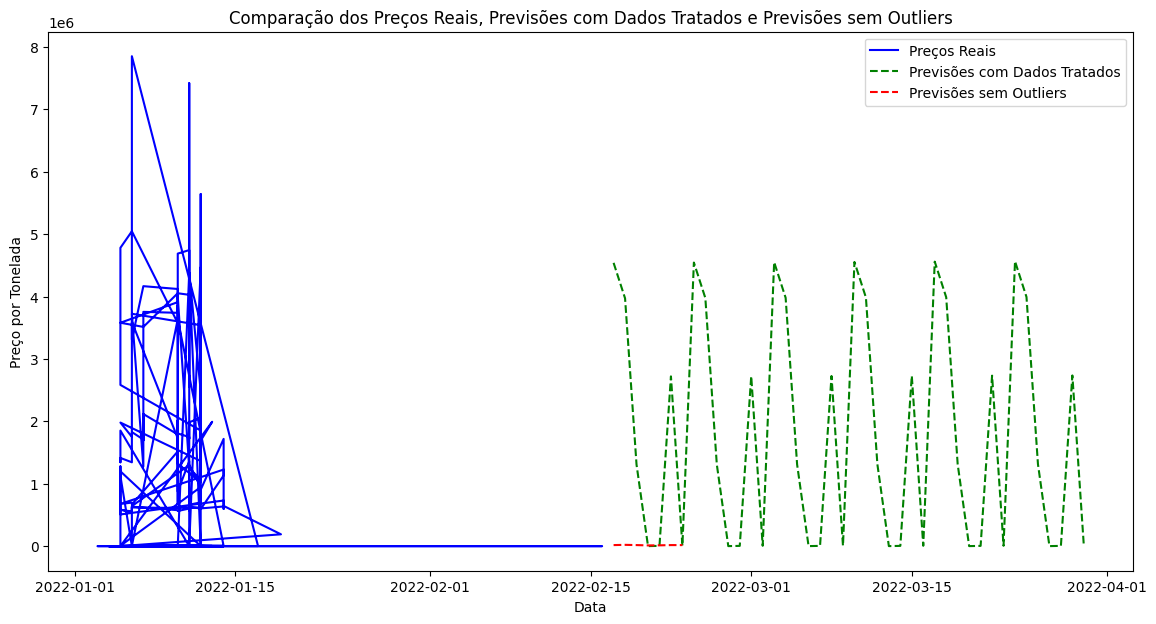

,DATA,PRECO_POR_TON_PREDITO
2268,2022-02-17,18133.192539
2269,2022-02-18,22075.979151
2270,2022-02-19,18256.438537
2271,2022-02-20,13069.099204
2272,2022-02-21,14149.170650
2273,2022-02-22,18170.878510
2274,2022-02-23,17934.988100


In [ ]:
# Primeiro, identificamos os outliers usando o z-score para as colunas 'QTD_TON' e 'PRECO_POR_TON'.
z_scores = np.abs(stats.zscore(dados[['QTD_TON', 'PRECO_POR_TON']]))
outliers_mask = (z_scores > 3).any(axis=1)

# Removemos os outliers do conjunto de dados
dados_sem_outliers = dados[~outliers_mask]

# Reordenamos o conjunto de dados sem outliers por data
dados_sem_outliers.sort_values('DATA', inplace=True)

# Aplicamos o modelo de suavização exponencial aos dados sem outliers
modelo_sem_outliers = ExponentialSmoothing(
    dados_sem_outliers['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()

# Geramos previsões para os próximos 7 dias
previsoes_sem_outliers = modelo_sem_outliers.forecast(7)

# Criamos um dataframe para armazenar as previsões com as datas correspondentes
previsoes_sem_outliers_df = pd.DataFrame({
    'DATA': pd.date_range(start=dados_sem_outliers['DATA'].max() + pd.Timedelta(days=1), periods=7),
    'PRECO_POR_TON_PREDITO': previsoes_sem_outliers
})

# Agora, vamos visualizar as previsões em comparação com os dados reais e anteriores
plt.figure(figsize=(14, 7))

# Preços reais
plt.plot(dados['DATA'], dados['PRECO_POR_TON'], label='Preços Reais', color='blue')

# Previsões anteriores com dados tratados
plt.plot(previsoes_df['DATA'], previsoes_df['PRECO_POR_TON_PREDITO'], label='Previsões com Dados Tratados', color='green', linestyle='--')

# Novas previsões sem outliers
plt.plot(previsoes_sem_outliers_df['DATA'], previsoes_sem_outliers_df['PRECO_POR_TON_PREDITO'], label='Previsões sem Outliers', color='red', linestyle='--')

plt.title('Comparação dos Preços Reais, Previsões com Dados Tratados e Previsões sem Outliers')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()

# Retornamos as previsões para uso posterior
previsoes_sem_outliers_df

           QTD_TON  PRECO_POR_TON
count  2372.000000    2372.000000
mean     11.406536    1652.565961
std      11.351254    1504.420261
min       0.300000      38.930000
25%       1.000000     844.799910
50%      11.140000    1020.799947
75%      18.610000    1694.970000
max      41.300000    7849.840000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to con

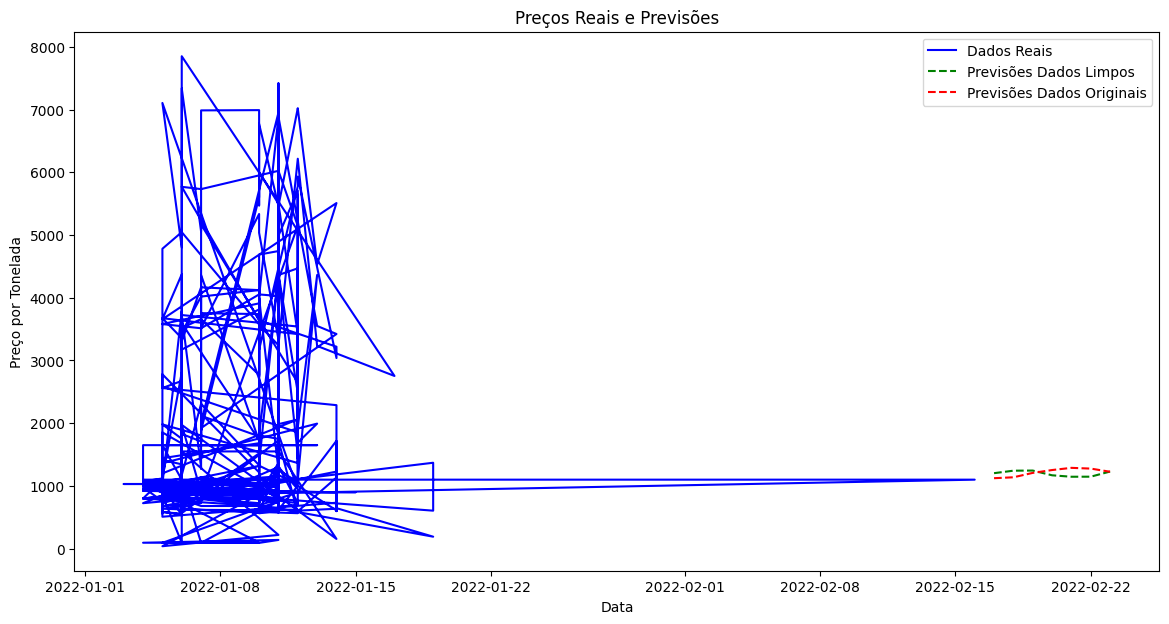

In [ ]:
# Antes de executar novamente o código para remoção de outliers e reajuste do modelo,
# precisamos garantir que os dados estejam no formato correto.
# Vamos verificar se os dados estão como esperado.
print(dados[['QTD_TON', 'PRECO_POR_TON']].describe())

# Identificando os outliers utilizando o método z-score.
z_scores = np.abs(stats.zscore(dados[['QTD_TON', 'PRECO_POR_TON']]))
outliers = (z_scores > 3).any(axis=1)

# Vamos remover esses outliers do nosso conjunto de dados.
dados_limpos = dados[~outliers]

# Agora aplicamos o modelo de suavização exponencial novamente para criar previsões para os próximos 7 dias.
# Dados tratados sem outliers
modelo_limpo = ExponentialSmoothing(
    dados_limpos['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()
previsoes_limpo = modelo_limpo.forecast(7)

# Dados originais com outliers
modelo_original = ExponentialSmoothing(
    dados['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()
previsoes_original = modelo_original.forecast(7)

# Criação de um DataFrame para as novas previsões
previsoes_limpo_df = pd.DataFrame({
    'DATA': pd.date_range(start=dados_limpos['DATA'].max(), periods=8, closed='right'),
    'PRECO_POR_TON_PREDITO_LIMPO': previsoes_limpo
})

# Visualização dos resultados
plt.figure(figsize=(14, 7))
plt.plot(dados['DATA'], dados['PRECO_POR_TON'], label='Dados Reais', color='blue')
plt.plot(previsoes_limpo_df['DATA'], previsoes_limpo_df['PRECO_POR_TON_PREDITO_LIMPO'], label='Previsões Dados Limpos', color='green', linestyle='--')
plt.plot(previsoes_limpo_df['DATA'], previsoes_original, label='Previsões Dados Originais', color='red', linestyle='--')
plt.title('Preços Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()


           QTD_TON  PRECO_POR_TON
count  2372.000000    2372.000000
mean     11.406536    1652.565961
std      11.351254    1504.420261
min       0.300000      38.930000
25%       1.000000     844.799910
50%      11.140000    1020.799947
75%      18.610000    1694.970000
max      41.300000    7849.840000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to con

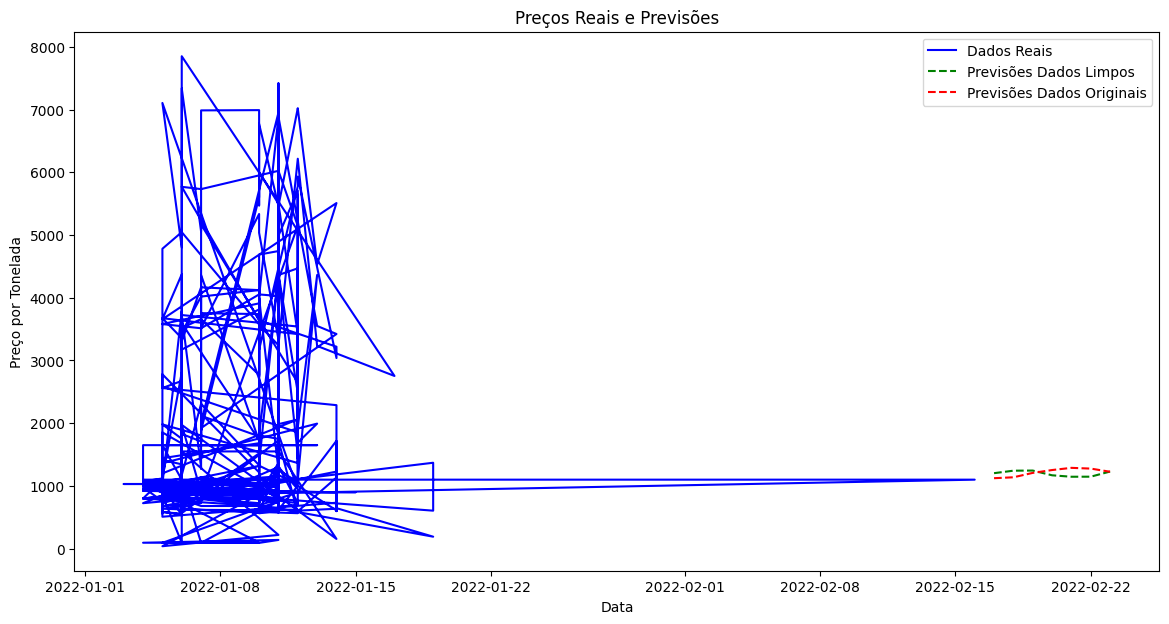

In [ ]:
# Antes de executar novamente o código para remoção de outliers e reajuste do modelo,
# precisamos garantir que os dados estejam no formato correto.
# Vamos verificar se os dados estão como esperado.
print(dados[['QTD_TON', 'PRECO_POR_TON']].describe())

# Identificando os outliers utilizando o método z-score.
z_scores = np.abs(stats.zscore(dados[['QTD_TON', 'PRECO_POR_TON']]))
outliers = (z_scores > 3).any(axis=1)

# Vamos remover esses outliers do nosso conjunto de dados.
dados_limpos = dados[~outliers]

# Agora aplicamos o modelo de suavização exponencial novamente para criar previsões para os próximos 7 dias.
# Dados tratados sem outliers
modelo_limpo = ExponentialSmoothing(
    dados_limpos['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()
previsoes_limpo = modelo_limpo.forecast(7)

# Dados originais com outliers
modelo_original = ExponentialSmoothing(
    dados['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()
previsoes_original = modelo_original.forecast(7)

# Criação de um DataFrame para as novas previsões
previsoes_limpo_df = pd.DataFrame({
    'DATA': pd.date_range(start=dados_limpos['DATA'].max(), periods=8, closed='right'),
    'PRECO_POR_TON_PREDITO_LIMPO': previsoes_limpo
})

# Visualização dos resultados
plt.figure(figsize=(14, 7))
plt.plot(dados['DATA'], dados['PRECO_POR_TON'], label='Dados Reais', color='blue')
plt.plot(previsoes_limpo_df['DATA'], previsoes_limpo_df['PRECO_POR_TON_PREDITO_LIMPO'], label='Previsões Dados Limpos', color='green', linestyle='--')
plt.plot(previsoes_limpo_df['DATA'], previsoes_original, label='Previsões Dados Originais', color='red', linestyle='--')
plt.title('Preços Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()


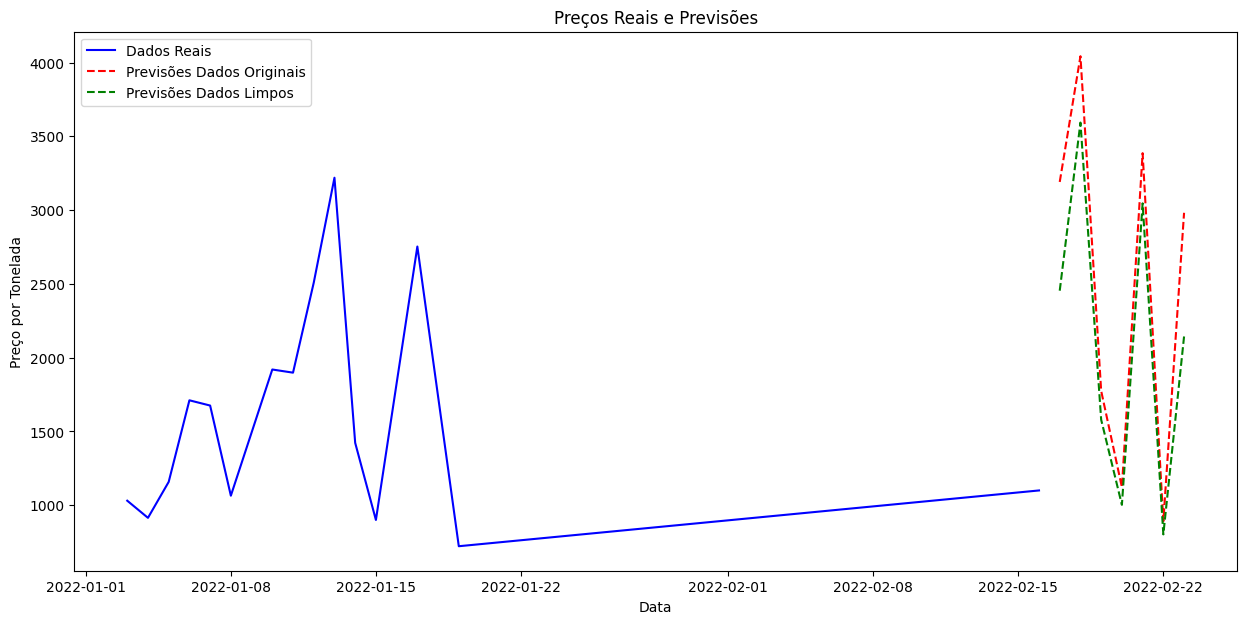

,Data,Previsão Original,Previsão Limpa
15,2022-02-17,3190.800816,2453.743476
16,2022-02-18,4042.822092,3593.061287
17,2022-02-19,1774.369875,1579.354320
18,2022-02-20,1121.814485,1002.623186
19,2022-02-21,3385.907451,3045.566233
20,2022-02-22,891.581074,802.230226
21,2022-02-23,2981.670613,2143.452811


In [ ]:
# Calculando a média diária dos preços
dados_diarios_originais = dados.groupby(dados['DATA'].dt.date)['PRECO_POR_TON'].mean().reset_index()
dados_diarios_limpos = dados_limpos.groupby(dados_limpos['DATA'].dt.date)['PRECO_POR_TON'].mean().reset_index()

# Convertendo 'DATA' de volta para datetime para plotagem e modelagem
dados_diarios_originais['DATA'] = pd.to_datetime(dados_diarios_originais['DATA'])
dados_diarios_limpos['DATA'] = pd.to_datetime(dados_diarios_limpos['DATA'])

# Aplicando o modelo de suavização exponencial para os dados diários originais
modelo_diario_original = ExponentialSmoothing(
    dados_diarios_originais['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()

# Aplicando o modelo de suavização exponencial para os dados diários limpos
modelo_diario_limpo = ExponentialSmoothing(
    dados_diarios_limpos['PRECO_POR_TON'],
    trend='add',
    seasonal='mul',
    seasonal_periods=7
).fit()

# Gerando previsões para os próximos 7 dias para ambos os conjuntos de dados
previsoes_diario_original = modelo_diario_original.forecast(7)
previsoes_diario_limpo = modelo_diario_limpo.forecast(7)

# Preparando os dados para plotagem
data_maxima = dados_diarios_originais['DATA'].max()
datas_previsao = pd.date_range(start=data_maxima + pd.Timedelta(days=1), periods=7)

# Plotando os resultados
plt.figure(figsize=(15, 7))
plt.plot(dados_diarios_originais['DATA'], dados_diarios_originais['PRECO_POR_TON'], label='Dados Reais', color='blue')
plt.plot(datas_previsao, previsoes_diario_original, label='Previsões Dados Originais', color='red', linestyle='--')
plt.plot(datas_previsao, previsoes_diario_limpo, label='Previsões Dados Limpos', color='green', linestyle='--')
plt.title('Preços Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()

# Criando tabelas comparativas
tabela_comparativa = pd.DataFrame({
    'Data': datas_previsao,
    'Previsão Original': previsoes_diario_original,
    'Previsão Limpa': previsoes_diario_limpo
})

tabela_comparativa


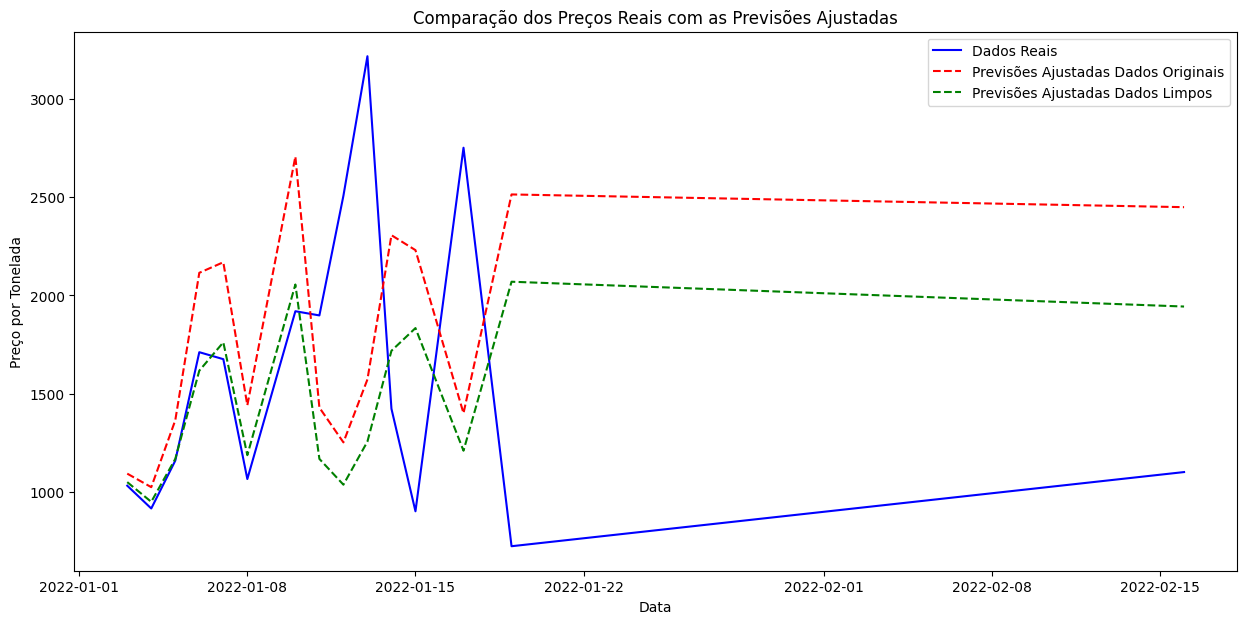

(        Data   Preço Real  Previsão Ajustada
 0 2022-01-03  1030.600000        1091.986166
 1 2022-01-04   914.338290        1022.988374
 2 2022-01-05  1158.017855        1363.911672
 3 2022-01-06  1710.932092        2115.521053
 4 2022-01-07  1675.359412        2169.345326,
         Data   Preço Real  Previsão Ajustada
 0 2022-01-03  1030.600000        1048.750799
 1 2022-01-04   914.338290         948.293857
 2 2022-01-05  1104.445133        1166.917091
 3 2022-01-06  1502.719607        1616.767596
 4 2022-01-07  1608.131430        1761.109881)

In [ ]:
# Vamos aplicar os modelos criados aos dados históricos para comparar a performance deles com os dados reais.
# Ajustamos os modelos anteriormente, então agora podemos aplicar as previsões ajustadas (fitted values) ao nosso conjunto de dados.

# Calculamos as previsões ajustadas (fitted values) para cada modelo
dados_diarios_originais['PRECO_POR_TON_FITTED_ORIGINAL'] = modelo_diario_original.fittedvalues
dados_diarios_limpos['PRECO_POR_TON_FITTED_LIMPO'] = modelo_diario_limpo.fittedvalues

# Agora plotamos os dados reais contra as previsões ajustadas para cada conjunto de dados
plt.figure(figsize=(15, 7))
plt.plot(dados_diarios_originais['DATA'], dados_diarios_originais['PRECO_POR_TON'], label='Dados Reais', color='blue')
plt.plot(dados_diarios_originais['DATA'], dados_diarios_originais['PRECO_POR_TON_FITTED_ORIGINAL'], label='Previsões Ajustadas Dados Originais', color='red', linestyle='--')
plt.plot(dados_diarios_limpos['DATA'], dados_diarios_limpos['PRECO_POR_TON_FITTED_LIMPO'], label='Previsões Ajustadas Dados Limpos', color='green', linestyle='--')
plt.title('Comparação dos Preços Reais com as Previsões Ajustadas')
plt.xlabel('Data')
plt.ylabel('Preço por Tonelada')
plt.legend()
plt.show()

# Criamos uma tabela comparativa das previsões ajustadas e dos preços reais para os dados originais
tabela_comparativa_original = pd.DataFrame({
    'Data': dados_diarios_originais['DATA'],
    'Preço Real': dados_diarios_originais['PRECO_POR_TON'],
    'Previsão Ajustada': dados_diarios_originais['PRECO_POR_TON_FITTED_ORIGINAL']
})

# E uma tabela comparativa para os dados limpos
tabela_comparativa_limpo = pd.DataFrame({
    'Data': dados_diarios_limpos['DATA'],
    'Preço Real': dados_diarios_limpos['PRECO_POR_TON'],
    'Previsão Ajustada': dados_diarios_limpos['PRECO_POR_TON_FITTED_LIMPO']
})

# Exibimos as tabelas
tabela_comparativa_original.head(), tabela_comparativa_limpo.head()


In [ ]:
# Vamos calcular a diferença entre o real e o previsto para ambos os conjuntos de dados.

# Certificamo-nos de que os índices estejam alinhados antes de subtrair.
dados_diarios_originais.set_index('DATA', inplace=True)
dados_diarios_limpos.set_index('DATA', inplace=True)

# Calculamos as diferenças e variações para os dados originais.
dados_diarios_originais['DIFERENCA_ORIGINAL'] = dados_diarios_originais['PRECO_POR_TON'] - dados_diarios_originais['PRECO_POR_TON_FITTED_ORIGINAL']
dados_diarios_originais['VARIACAO_ORIGINAL'] = dados_diarios_originais['DIFERENCA_ORIGINAL'].diff().fillna(0)

# Calculamos as diferenças e variações para os dados limpos.
dados_diarios_limpos['DIFERENCA_LIMPO'] = dados_diarios_limpos['PRECO_POR_TON'] - dados_diarios_limpos['PRECO_POR_TON_FITTED_LIMPO']
dados_diarios_limpos['VARIACAO_LIMPO'] = dados_diarios_limpos['DIFERENCA_LIMPO'].diff().fillna(0)

# Preparamos tabelas comparativas com as diferenças e variações.
tabela_comparativa_original = dados_diarios_originais.reset_index()
tabela_comparativa_limpo = dados_diarios_limpos.reset_index()

tabela_comparativa_original = tabela_comparativa_original[['DATA', 'PRECO_POR_TON', 'PRECO_POR_TON_FITTED_ORIGINAL', 'DIFERENCA_ORIGINAL', 'VARIACAO_ORIGINAL']]
tabela_comparativa_limpo = tabela_comparativa_limpo[['DATA', 'PRECO_POR_TON', 'PRECO_POR_TON_FITTED_LIMPO', 'DIFERENCA_LIMPO', 'VARIACAO_LIMPO']]

# Exibimos as tabelas para visualização.
tabela_comparativa_original.head(), tabela_comparativa_limpo.head()

tabela_comparativa_original.to_excel('tabela_comparativa_original.xlsx', index=False)
tabela_comparativa_limpo.to_excel('tabela_comparativa_limpo.xlsx', index=False)
